# Análisis de Resultados (Generales)

In [1]:
import numpy as np
import datetime
from datetime import date
import json
import pylab
import pandas as pd
import matplotlib.pyplot as plt
import os, sys
from sklearn.preprocessing import normalize

In [2]:
import configparser
Config = configparser.ConfigParser()
Config.read("Config.conf")

['Config.conf']

In [3]:
def ConfigSectionMap(section):
    dict1 = {}
    options = Config.options(section)
    for option in options:
        try:
            dict1[option] = Config.get(section, option)
            if dict1[option] == -1:
                DebugPrint("skip: %s" % option)
        except:
            print("exception on %s!" % option)
            dict1[option] = None
    return dict1

## Cargamos Data

In [4]:
path_res = ConfigSectionMap("f4")['union']
    
result = pd.read_csv(path_res, sep=",", header=0,  dtype={'week': str,'year': str}, low_memory=False)
print(len(result))
result.head(5)

920


,CO_ID,YEAR,WEEK,PROFILE_ID,SIZE,D0T0P0,D0T0P1,D0T0P2,D0T0P3,D0T0P4,...,D6T3P30,D6T3P31,D6T3P32,D6T3P33,D6T3P34,D6T3P35,D6T3P36,D6T3P37,INDIVIDUAL_CLUSTER,COLLECTIVE_CLUSTER
0,9181911,2018,31,0,1.8898,0.0000,0.0000,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,23
1,9181911,2018,32,1,0.5836,0.0013,0.0012,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,23
2,9185006,2018,31,0,9.5408,0.0000,0.0000,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,26
3,9185006,2018,32,1,2.9736,0.2852,0.0022,0.003,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,26
4,9191171,2018,31,0,7.2394,0.0000,0.0000,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,10


### Variables de Apoyo - Clientes

In [5]:
clientes = result.CO_ID.unique()      # Lista de Clientes

In [6]:
#  pip install plotly 

## Distribución de Clientes por Cluster

#### Por Cluster Collectivo

=>   29  clusters
Done


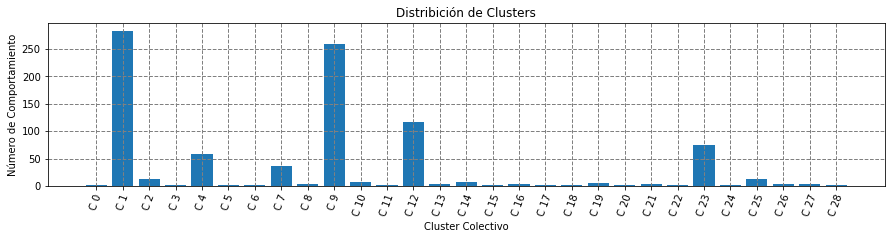

In [7]:
   
#   -------------------------------------------------------------------------------------------------       
temporal= result.groupby(['COLLECTIVE_CLUSTER'], as_index=False, sort=True)['CO_ID'].count()

print("=>  ",str(len(temporal))," clusters")

fig = plt.figure(figsize=(15,3))
ax = fig.add_subplot(111, frameon=True)

data = ax.bar(temporal.index, temporal['CO_ID'], align='center')
ax.grid(color='gray', linestyle='--', linewidth=1)

ax.set_xlabel('Cluster Colectivo')
ax.set_xticks(temporal.index)

ax.set_ylabel('Número de Comportamiento')
tag =[]
for j in range(len(temporal)):
    nn = 'C '+ str(j)+''
    tag.append(nn)
    del(nn)

ax.set_xticklabels(tag, rotation=70)



title = "Distribición de Clusters"
ax.set_title(title,)
# plt.show()
plt.savefig("../resultados/Collective_Clusters.png",dpi = 1000)
del(temporal)
print('Done')

#### Por Cluster  Individual

=>   1  clusters
Done


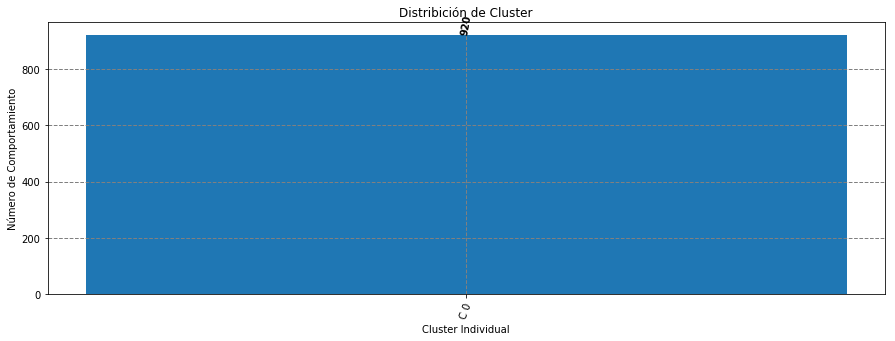

In [8]:
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.00*height,
                '%d' % int(height),
                ha='center', va='bottom',  rotation=80, fontweight='bold', color='Black')
        
        
#   -------------------------------------------------------------------------------------------------       
temporal= result.groupby(['INDIVIDUAL_CLUSTER'], as_index=False, sort=True)['CO_ID'].count()

print("=>  ",str(len(temporal))," clusters")
#fig, ax = plt.subplots()

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111, frameon=True)

data = ax.bar(temporal.index, temporal['CO_ID'], align='center')
ax.grid(color='gray', linestyle='--', linewidth=1)

ax.set_xlabel('Cluster Individual')
ax.set_xticks(temporal.index)

ax.set_ylabel('Número de Comportamiento')
tag =[]
for j in range(len(temporal)):
    nn = 'C '+ str(j)+''
    tag.append(nn)
    del(nn)

ax.set_xticklabels(tag, rotation=70)

autolabel(data)

title = "Distribición de Cluster"
ax.set_title(title)
# plt.show()
plt.savefig("../resultados/Individual_Clusters.png",dpi = 1000)
del(temporal)
print('Done')

## Clusters Individual por collectivo

In [9]:
# matrix of clusters

temporal= result.groupby(['COLLECTIVE_CLUSTER','INDIVIDUAL_CLUSTER'], as_index=False, sort=True)['CO_ID'].count()

matrix = np.zeros((len(temporal.COLLECTIVE_CLUSTER.unique()), len(temporal.INDIVIDUAL_CLUSTER.unique())))
for x in temporal.COLLECTIVE_CLUSTER.unique():
    temporal_i = temporal[(temporal.COLLECTIVE_CLUSTER == x)]
    temporal_i = temporal_i.groupby(['INDIVIDUAL_CLUSTER'], as_index=False, sort=True)['CO_ID'].sum().T
    a = list(temporal_i.values[1])
    for i in range(len(a)):
        matrix[x][i]=a[i]
    del(a,temporal_i)
temporal = pd.DataFrame(matrix)
matrix
# temporal['total']=temporal.iloc[:,:].sum(axis=1)
temporal.head()
#temporal


,0
0,2.0
1,283.0
2,13.0
3,2.0
4,58.0


### Variables de Apoyo - Planes

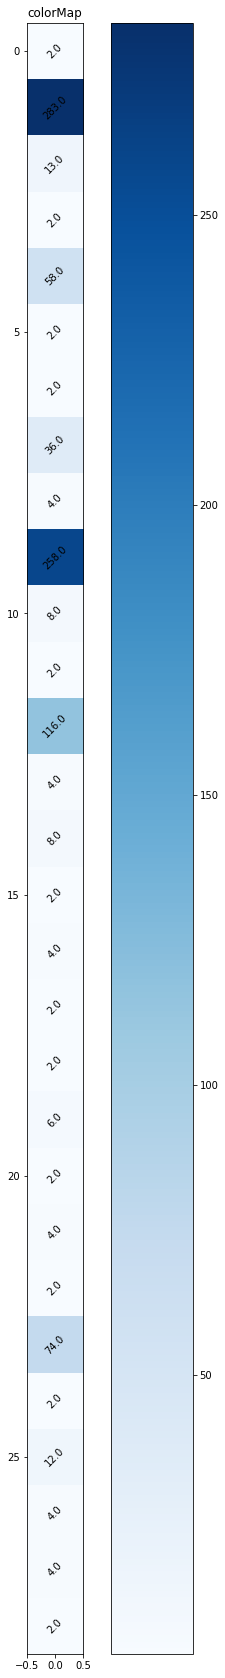

In [10]:
H = matrix

fig = plt.figure(figsize=(10, 30))

ax = fig.add_subplot(111)
ax.set_title('colorMap')

im = plt.imshow(H, cmap="Blues")

# plt.imshow(H)
ax.set_aspect('equal')


for i in range(len(temporal)):
    for j in range(len(temporal.iloc[1])):
        text = ax.text(j, i, round(matrix[i, j],3), ha="center", va="center", color="Black", rotation=45)

ax.get_xaxis().set_visible(True)
ax.get_yaxis().set_visible(True)
ax.patch.set_alpha(0)
ax.set_frame_on(True)
plt.colorbar(orientation='vertical')
plt.savefig("../resultados/Coll_Ind_Clusters.jpg",dpi = 1000, bbox_inches='tight')
# plt.show()

## Comportamiento de los clusters en el Tiempo

No handles with labels found to put in legend.


Done


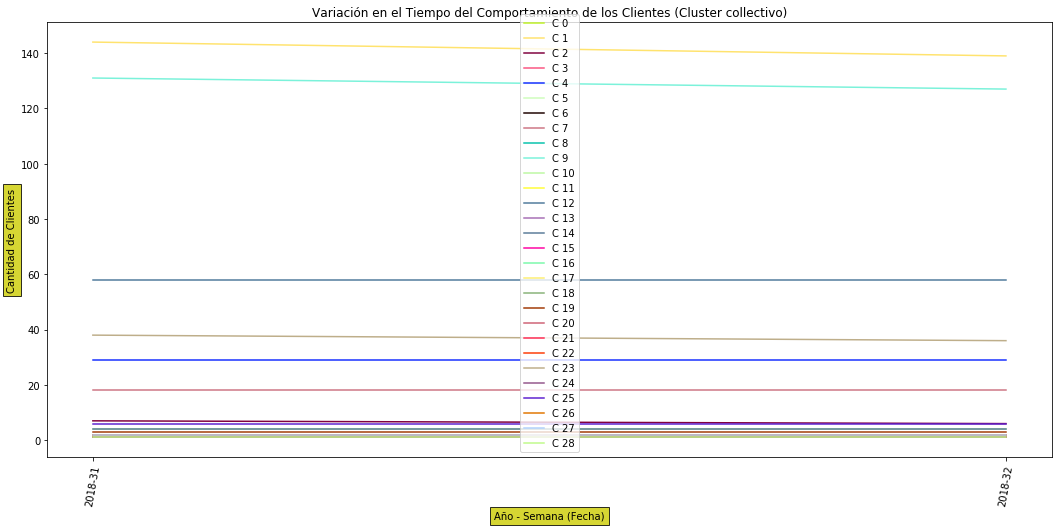

In [11]:
from datetime import datetime
def fromisocalendar(y,w,d):
    date = datetime.strptime( "%04dW%02d-%d"%(y,w-1,d), "%YW%W-%w")
    aa = date.year
    mm = date.month
    dd = date.day
    return str(aa)+"-"+str(mm)+"-"+str(dd) 

import matplotlib._color_data as mcd
box = dict(facecolor='#cccc00', pad=4, alpha=0.8)

   
longitud = len(result.groupby(['COLLECTIVE_CLUSTER'], as_index=False, sort=True)['CO_ID'].count())
temporal = result.groupby(['YEAR','WEEK','COLLECTIVE_CLUSTER'], as_index=False, sort=True)['CO_ID'].count()
temporal['fecha'] = temporal['YEAR'].astype(str).str.cat(temporal['WEEK'].astype(str), sep='-')
temporal = temporal[['fecha','COLLECTIVE_CLUSTER','CO_ID']]
helper = temporal.groupby(['fecha']).count()
helper['fecha'] = helper.index
    
fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot(111, frameon=True)
x = list(temporal['fecha'].drop_duplicates())
x1 = x
for j in range(len(x)):
    # x1[j] = fromisocalendar(int(x[j][:4]),int(x[j][5:len(x[j])]),2)
    x1[j] = x[j]
        
ax.set_xticklabels(x1, rotation=80)

# ------------ COLORES ---------------------
overlap = mcd.XKCD_COLORS
colores = ["" for x in range(len(overlap))]
for j, n in enumerate(sorted(overlap, reverse=True)):
    cor = mcd.XKCD_COLORS[n].upper()
    colores[j] = cor

legend = ax.legend(loc='upper center', shadow=True, fontsize='x-large')

from datetime import datetime

for k in range(longitud):
    cluster_k = temporal[temporal['COLLECTIVE_CLUSTER']==k]
    cluster_k1 = helper.set_index('fecha').join(cluster_k.set_index('fecha'), lsuffix='_x', rsuffix='_y')
    cluster_k1 = cluster_k1[['CO_ID_y']]
    cluster_k1 = cluster_k1.fillna(0)
    y = cluster_k1['CO_ID_y']
    #x = cluster_k1.index
    ax.plot(x,y,'-',color=colores[k*9],label="C "+str(k))

    
    
ax.legend()
title = 'Variación en el Tiempo del Comportamiento de los Clientes (Cluster collectivo)'
ax.set_title(title)
ax.set_xlabel('Año - Semana (Fecha)', bbox=box)
ax.set_ylabel('Cantidad de Clientes', bbox=box)

plt.savefig("../resultados/Collective_Clusters_Time.png",dpi = 1000)
del(temporal,helper)
print('Done')

## Distribucion de Semanas con "n" Clientes 

=>   2  clusters
Done


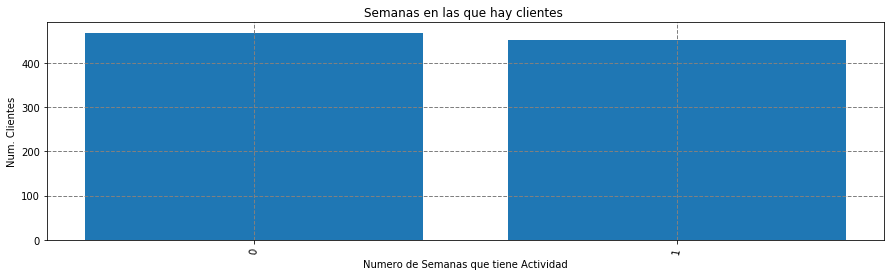

In [12]:
temp= result.groupby(['PROFILE_ID'], as_index=False, sort=True)['CO_ID'].count()

print("=>  ",str(len(temp))," clusters")

fig = plt.figure(figsize=(15,4))
ax = fig.add_subplot(111, frameon=True)
ax.bar(temp.index, temp['CO_ID'], align='center')
ax.grid(color='gray', linestyle='--', linewidth=1)

ax.set_xlabel('Numero de Semanas que tiene Actividad')
ax.set_xticks(temp.index)

ax.set_ylabel('Num. Clientes')
tag =[]
for j in range(len(temp)):
    nn = ''+ str(j)+''
    tag.append(nn)
    del(nn)

ax.set_xticklabels(tag, rotation=80)
    
title = "Semanas en las que hay clientes "
ax.set_title(title)
# plt.show()
plt.savefig("../resultados/Actividades_Clientes_time.png",dpi = 1000)
del(temp)
print('Done')


=>   2  clusters
Done


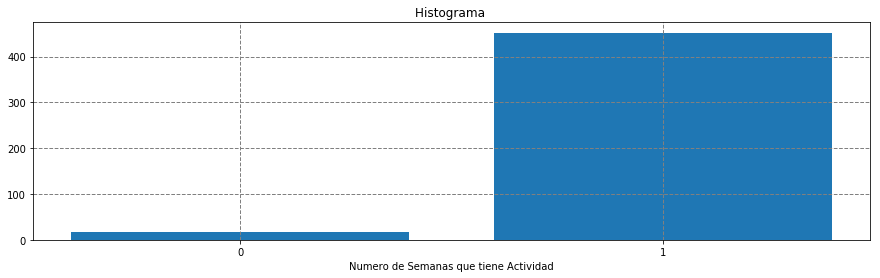

In [13]:
temp = result.groupby(['CO_ID'], as_index=False, sort=True)['SIZE'].count()
temp = temp.groupby(['SIZE'], as_index=False, sort=True).count()

print("=>  ",str(len(temp))," clusters")

fig = plt.figure(figsize=(15,4))
ax = fig.add_subplot(111, frameon=True)
ax.bar(temp.index, temp['CO_ID'], align='center')
ax.grid(color='gray', linestyle='--', linewidth=1)

ax.set_xlabel('Numero de Semanas que tiene Actividad')
ax.set_xticks(temp.index)
"""
ax.set_ylabel('Num. Clientes')
tag =[]
for j in range(len(temp)):
    nn = ''+ str(j)+''
    tag.append(nn)
    del(nn)

ax.set_xticklabels(tag, rotation=80)
    """
title = "Histograma "
ax.set_title(title)

plt.savefig("../resultados/Frecuencia_Cliente.png",dpi = 1000)
#plt.show()
del(temp)
print('Done')


## Centroides

In [14]:
# Abrimos el File para cargar los centroides 
path_res = path_res = ConfigSectionMap("f3")['cc_cluster']
centroides = pd.read_csv(path_res, sep=";", header=0,  dtype={'WEEK': str,'YEAR': str})



### Seleccionamos Centroide o cluster deseado

In [15]:
num_cluster = int(ConfigSectionMap("f5")['center'])
# extraemos
centroides_i = centroides[(centroides.COLLECTIVE_CLUSTER == num_cluster)]
centroides_i

,COLLECTIVE_CLUSTER,D0T0P0,D0T0P1,D0T0P2,D0T0P3,D0T0P4,D0T0P5,D0T0P6,D0T0P7,D0T0P8,...,D6T3P28,D6T3P29,D6T3P30,D6T3P31,D6T3P32,D6T3P33,D6T3P34,D6T3P35,D6T3P36,D6T3P37
17,17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
# Definimos parametros
title = centroides_i.iloc[:,1:].columns
datos = centroides_i.iloc[:,1:].values
datos = datos[0]
turnos = ["Mad", "Mañ", "Tar", "Noc"]
dias = ["L", "M", "M", "J", "V", "S", "D"]


In [17]:
td = np.zeros((len(turnos),len(dias)))
tm = np.zeros((len(turnos),38))
dm = np.zeros((len(dias),38))

# Agrupamos por Planes 
contador = 0
for m in range(38):
    for t in range(len(turnos)):        # filas
        for d in range(len(dias)):    #columnas 
            
            td[t][d] += datos[contador]
            contador += 1

# Agrupamos por Dias 
contador = 0
for m in range(38):
    for t in range(len(turnos)):        # filas
        for d in range(len(dias)):    #columnas
            tm[t][m] += datos[contador]
            contador += 1
            
# Agrupamos por Turnos 
contador = 0
for m in range(38):
    for t in range(len(turnos)):        # filas
        for d in range(len(dias)):    #columnas
            dm[d][m] += datos[contador]
            contador += 1

In [18]:
td

array([[3.2655e-01, 3.1455e-01, 3.2095e-01, 2.9255e-01, 7.0000e-03,
        6.5000e-04, 2.0495e-01],
       [2.0365e-01, 2.1515e-01, 1.9615e-01, 7.7830e-01, 7.2675e-01,
        4.9550e-01, 4.8315e-01],
       [1.9100e-02, 2.7000e-03, 5.3320e-01, 5.2690e-01, 8.5100e-02,
        6.4000e-02, 2.5850e-01],
       [2.3420e-01, 2.4700e-02, 2.3500e-03, 4.4790e-01, 4.3345e-01,
        4.5950e-02, 1.1700e-02]])

### Plot de centroide i

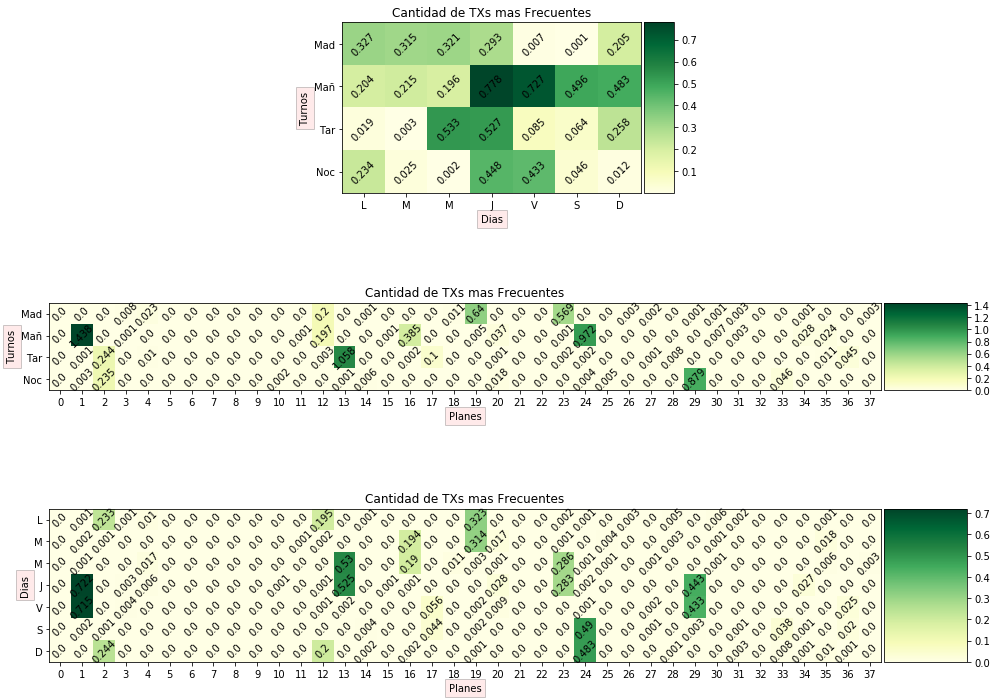

In [19]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
box = dict(facecolor='#ff9999', pad=4, alpha=0.2)

fig, axes = plt.subplots(3, 1, figsize=(15,30))
#fig, axes = plt.subplots(3, 1)
ax1, ax2 , ax3= axes.flatten()
plt.subplots_adjust(top=0.8, bottom=0.5, left=0.10, right=0.95, hspace=0.4, wspace=0.3)



im1 = ax1.imshow(td, cmap="YlGn")
ax1.set_xticks(np.arange(len(dias)))
ax1.set_yticks(np.arange(len(turnos)))
ax1.set_xticklabels(dias)
ax1.set_yticklabels(turnos)
for i in range(len(turnos)):
    for j in range(len(dias)):
        text = ax1.text(j, i, round(td[i, j],3), ha="center", va="center", color="Black", rotation=45)
ax1.set_title('Cantidad de TXs mas Frecuentes')
ax1.set_xlabel('Dias', bbox=box)
ax1.set_ylabel('Turnos', bbox=box)
divider1 = make_axes_locatable(ax1)
cax1 = divider1.append_axes("right", size="10%", pad=0.05)
cbar1 = plt.colorbar(im1, cax=cax1)
ax1.xaxis.set_visible(True)

im2 = ax2.imshow(tm, cmap="YlGn")
ax2.set_xticks(np.arange(38))
ax2.set_yticks(np.arange(len(turnos)))
ax2.set_xticklabels(range(38))
ax2.set_yticklabels(turnos)
for i in range(len(turnos)):
    for j in range(38):
        text = ax2.text(j, i, round(tm[i, j],3), ha="center", va="center", color="Black", rotation=45)
ax2.set_title('Cantidad de TXs mas Frecuentes')
ax2.set_xlabel('Planes', bbox=box)
ax2.set_ylabel('Turnos', bbox=box)
divider2 = make_axes_locatable(ax2)
cax2 = divider2.append_axes("right", size="10%", pad=0.05)
cbar2 = plt.colorbar(im2, cax=cax2)
ax2.xaxis.set_visible(True)

im3 = ax3.imshow(dm, cmap="YlGn")
ax3.set_xticks(np.arange(38))
ax3.set_yticks(np.arange(len(dias)))
ax3.set_xticklabels(range(38))
ax3.set_yticklabels(dias)
for i in range(len(dias)):
    for j in range(38):
        text = ax3.text(j, i, round(dm[i, j],3), ha="center", va="center", color="Black", rotation=45)
ax3.set_title('Cantidad de TXs mas Frecuentes')
ax3.set_xlabel('Planes', bbox=box)
ax3.set_ylabel('Dias', bbox=box)
divider3 = make_axes_locatable(ax3)
cax3 = divider3.append_axes("right", size="10%", pad=0.05)
cbar3 = plt.colorbar(im3, cax=cax3)
ax3.xaxis.set_visible(True)
plt.savefig("../resultados/Centroide_i.png",dpi = 1000, bbox_inches='tight')
